In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="font-family:Times New Roman;"> <center> Pytorch Feedforward Network Tutorial</center> </h1>
<p><center style="color:#159364; font-family:Times New Roman;font-size:30px;">“The beautiful thing about learning is nobody can take it away from you.” — B.B. King</center></p>

***

![Mnist](https://raw.githubusercontent.com/106AbdulBasit/Pytorch__Series/main/MNIST-%20FeedForward_Network/MnistExamples.png)




<span style="font-family:Times New Roman; font-size:18px;">In This Notebook you will learn </span>




<span style="font-family:Times New Roman; font-size:18px;">Introduction to Neural Networks </span>




<span style="font-family:Times New Roman; font-size:18px;">Some EDA </span>




<span style="font-family:Times New Roman; font-size:18px;">Making the model in Pytorch </span>




<span style="font-family:Times New Roman; font-size:18px;">Traing The model </span>




<span style="font-family:Times New Roman; font-size:18px;">Losses and Accuracies </span>




<span style="font-family:Times New Roman; font-size:18px;">Predictions </span>




<span style="font-family:Times New Roman; font-size:18px;">Submissions </span>



<div class="alert alert-block alert-info" style="font-size:14px; font-family:Times New Roman; line-height: 1.7em;">
    📌 &nbsp;  If you find this notebook useful in anyway, please upvote it so that it can reach a bigger audience. You can share it with your fellow kagglers. 🙏🙏
</div>

<h1  id="1" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Introduction to Networks</h1>
           
   


<span style="font-family:Times New Roman; font-size:18px;"> A detail descriptions of Neural Network with the reference of Brain precptrons will be added soon </span>


<h1  id="2" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 2 Importing some Libraries </h1>





In [1]:
import pandas as pd 
import numpy as np  
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torchvision
import numpy as np
import matplotlib
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import plotly.express as px



<h1  id="3" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">3 Some EDA </h1>

In [2]:
trainset = pd.read_csv('../input/digit-recognizer/train.csv')
testset = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
trainset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
trainLabels = trainset.loc[:,'label']
trainSamples = trainset.loc[:,'pixel0':]

In [5]:
trainSamples.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
trainLabels.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [7]:
trainLabels.head()
#print(len(trainLabels))


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
Class_Id_Dist_Total = trainLabels.value_counts()
Class_Id_Dist_Total.head(10)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
import plotly.graph_objects as go
fig = go.Figure(go.Bar(
            x= Class_Id_Dist_Total.values,
            y=Class_Id_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()


In [12]:
fig=px.pie(Class_Id_Dist_Total.head(10),values= 'label', names=Class_Id_Dist_Total.index, hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='MNIST DATA SET',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [13]:
trainSamples /= 255

In [14]:
print(len(trainLabels))
print(len(trainSamples))

42000
42000


<h1  id="4" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 4 Data Preprocessing </h1>

In [15]:
from torch.utils.data import Dataset,DataLoader

class datasets(Dataset):
    def __init__(self,images=trainSamples,labels = trainLabels):
        self.images = images
        self.labels = trainLabels
        
        self.len = len(images)
        
    def __len__(self):
        return self.len 
    
    def __getitem__(self,i):
        
        x = torch.tensor(np.array(trainSamples.loc[i,:]).reshape((28,28)),dtype=torch.float32).unsqueeze(0)
        y = torch.tensor(np.array(self.labels[i]),dtype=torch.long)
        return x,y

In [17]:
dataset = datasets()


<span style="font-family:Times New Roman; font-size:18px;">Let’s have a look at some of the images from the dataset. The images are converted to the Pytorch Tensors With the shape of 1x28x28 (Here 1 represents the dimensions means the color channel, and 28 x  28 represents the width and height). We will use plt.imshow to display the images. The permute method is used to reorder the dimensions of the image.  </span>

image.shape: torch.Size([1, 28, 28])
Label: tensor(7)


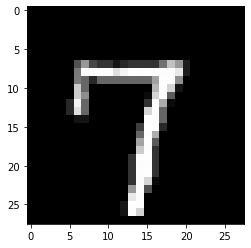

In [18]:
image, label = dataset[6]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [19]:
len(dataset)

42000


<span style="font-family:Times New Roman; font-size:18px;">We will use random_split helper function to set aside the images for the validation set. </span>

In [20]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(32000, 10000)


<span style="font-family:Times New Roman; font-size:18px;">Now we use Pytorch data loader function to create the data loader for the training and validation data set </span>

In [21]:
batch_size=128

In [23]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)


<span style="font-family:Times New Roman; font-size:18px;"> **Num_ Workers** == how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0) </span>


<span style="font-family:Times New Roman; font-size:18px;">  **Pin_Memory** == If True, the data loader will copy Tensors into device/CUDA pinned memory before returning them. If your data elements are a custom type, or your collate_fn returns a batch that is a custom type, see the example below.</span>


<span style="font-family:Times New Roman; font-size:18px;">Let visualize some of the images from the batch of the data in grid using  the make_grid function from torchvision</span>

images.shape: torch.Size([128, 1, 28, 28])


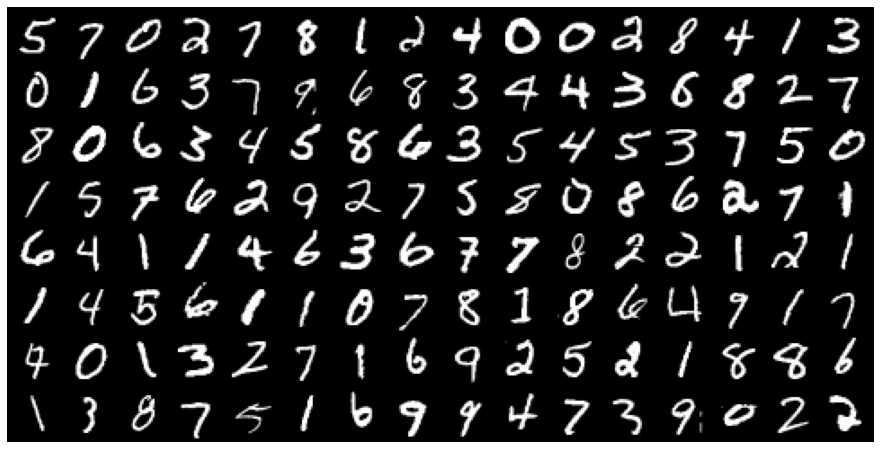

In [24]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break


<span style="font-family:Times New Roman; font-size:18px;">We will create the batch of input tensors. In order to do that, We‘ll flatten the 1x28x28 images into vectors of size 784, so they can be passed into an nn.Linear object.

 </span>

In [25]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])



<span style="font-family:Times New Roman; font-size:18px;">Next, let's create a `nn.Linear` object, which will serve as our _hidden_ layer. We'll set the size of the output from the hidden layer to 32. This number can be increased or decreased to change the _learning capacity_ of the model. </span>

In [26]:
input_size = inputs.shape[-1]
hidden_size = 32


<span style="font-family:Times New Roman; font-size:18px;">**Question** : Why we are using [-1] </span>


<span style="font-family:Times New Roman; font-size:18px;">Answer : -1 means the last index in the list. In our example, it points to 784 </span>

<h1  id="5" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 4 Linear Layers and activation Functions </h1>

In [27]:
layer1 = nn.Linear(input_size, hidden_size)

In [28]:
inputs.shape

torch.Size([128, 784])


<span style="font-family:Times New Roman; font-size:18px;">We can now compute intermediate outputs for the batch of images by passing `inputs` through `layer1`. </span>



In [30]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])



<span style="font-family:Times New Roman; font-size:18px;">The image vectors of size `784` are transformed into intermediate output vectors of length `32` by performing a matrix multiplication of `inputs` matrix with the transposed weights matrix of `layer1` and adding the bias. We can verify this using `torch.allclose` </span>

In [31]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [32]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True


<span style="font-family:Times New Roman; font-size:18px;">Thus, `layer1_outputs` and `inputs` have a linear relationship, i.e., each element of `layer_outputs` is a weighted sum of elements from `inputs`. Thus, even as we train the model and modify the weights, `layer1` can only capture linear relationships between `inputs` and `outputs`.

<img src="https://i.imgur.com/inXsLuq.png" width="360"> </span>



<span style="font-family:Times New Roman; font-size:18px;"> Next, we'll use the Rectified Linear Unit (ReLU) function as the activation function for the outputs. It has the formula `relu(x) = max(0,x)` i.e. it simply replaces negative values in a given tensor with the value 0. ReLU is a non-linear function, as seen here visually: </span>


<img src="https://i.imgur.com/yijV4xF.png" width="420">


<span style="font-family:Times New Roman; font-size:18px;"> We can use the `F.relu` method to apply ReLU to the elements of a tensor.</span>



In [33]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])


<span style="font-family:Times New Roman; font-size:18px;"> lets apply relu activation functoion.You can see it change the value from negative to zero. it does not change the entire value into positive . it just convert that negative value to minimum positive value which is 0 </span>

In [34]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.8914388418197632
min(relu_outputs): 0.0



<span style="font-family:Times New Roman; font-size:18px;">Next, let's create an output layer to convert vectors of length hidden_size in relu_outputs into vectors of length 10, which is the desired output of our model (since there are 10 target labels). </span>

In [35]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)


<span style="font-family:Times New Roman; font-size:18px;">We applied the linear function. In a moment you will understand. </span>

In [36]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [37]:
inputs.shape

torch.Size([128, 784])


<span style="font-family:Times New Roman; font-size:18px;">As expected, `layer2_outputs` contains a batch of vectors of size 10. We can now use this output to compute the loss using `F.cross_entropy` and adjust the weights of `layer1` and `layer2` using gradient descent.</span>

In [38]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3122, grad_fn=<NllLossBackward0>)


<span style="font-family:Times New Roman; font-size:18px;"> Thus, our model transforms `inputs` into `layer2_outputs` by applying a linear transformation (using `layer1`), followed by a non-linear activation (using `F.relu`), followed by another linear transformation (using `layer2`). Let's verify this by re-computing the output using basic matrix operations. </span>

In [84]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [85]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

<h1  id="6" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">6 Model Making </h1>


<span style="font-family:Times New Roman; font-size:18px;">We are now ready to define our model. As discussed above, we'll create a neural network with one hidden layer. Here's what that means:</span>



<span style="font-family:Times New Roman; font-size:18px;">* Instead of using a single `nn.Linear` object to transform a batch of inputs (pixel intensities) into outputs (class probabilities), we'll use two `nn.Linear` objects. Each of these is called a _layer_ in the network.  </span>


<span style="font-family:Times New Roman; font-size:18px;">* The first layer (also known as the hidden layer) will transform the input matrix of shape `batch_size x 784` into an intermediate output matrix of shape `batch_size x hidden_size`. The parameter `hidden_size` can be configured manually (e.g., 32 or 64).</span>


<span style="font-family:Times New Roman; font-size:18px;"> * We'll then apply a non-linear *activation function* to the intermediate outputs. The activation function transforms individual elements of the matrix. </span>


<span style="font-family:Times New Roman; font-size:18px;"> * The result of the activation function, which is also of size `batch_size x hidden_size`, is passed into the second layer (also known as the output layer).  The second layer transforms it into a matrix of size `batch_size x 10`. We can use this output to compute the loss and adjust weights using gradient descent.</span>


<span style="font-family:Times New Roman; font-size:18px;"> As discussed above, our model will contain one hidden layer. Here's what it looks like visually:
 </span>


<span style="font-family:Times New Roman; font-size:18px;">  Let's define the model by extending the `nn.Module` class from PyTorch </span>



<img src="https://i.imgur.com/eN7FrpF.png" width="480">


.

In [39]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


<span style="font-family:Times New Roman; font-size:18px;"> We also need to define an `accuracy` function which calculates the accuracy of the model's prediction on an batch of inputs. It's used in `validation_step` above. </span>

In [40]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


<span style="font-family:Times New Roman; font-size:18px;"> We'll create a model that contains a hidden layer with 32 activations. </span>

In [41]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [110]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)


<h1  id="7" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 7 Using GPU </h1>

In [42]:
torch.cuda.is_available()

False

<span style="font-family:Times New Roman; font-size:18px;"> Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't.  </span>


In [43]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [44]:
device = get_default_device()
device

device(type='cpu')

<span style="font-family:Times New Roman; font-size:18px;"> Next, let's define a function that can move data and model to a chosen device.</span>


In [45]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [46]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu


<span style="font-family:Times New Roman; font-size:18px;"> Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.</span>


In [47]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

<span style="font-family:Times New Roman; font-size:18px;"> The `yield` keyword in Python is used to create a generator function that can be used within a `for` loop, as illustrated below.</span>


In [48]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


In [49]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

<span style="font-family:Times New Roman; font-size:18px;"> Tensors moved to the GPU have a `device` property which includes that word `cuda`. Let's verify this by looking at a batch of data from `valid_dl`. </span>


In [50]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cpu
yb: tensor([9, 8, 3, 0, 2, 2, 2, 7, 0, 9, 6, 1, 4, 0, 2, 0, 1, 9, 6, 1, 0, 8, 3, 7,
        7, 1, 3, 7, 3, 3, 6, 6, 8, 7, 1, 8, 8, 4, 7, 3, 2, 5, 7, 4, 6, 2, 4, 4,
        0, 0, 3, 1, 1, 5, 7, 2, 2, 3, 2, 4, 9, 6, 6, 9, 6, 9, 7, 0, 2, 4, 3, 9,
        2, 7, 2, 9, 7, 8, 5, 8, 9, 1, 5, 2, 8, 6, 0, 6, 9, 2, 8, 0, 3, 1, 3, 6,
        4, 5, 6, 0, 7, 4, 8, 1, 1, 8, 9, 9, 4, 9, 1, 4, 3, 1, 0, 1, 0, 4, 4, 6,
        3, 1, 2, 6, 9, 4, 1, 1, 1, 0, 6, 0, 6, 0, 7, 0, 5, 7, 4, 1, 8, 6, 5, 5,
        0, 9, 8, 6, 1, 5, 5, 7, 7, 5, 8, 2, 9, 1, 6, 6, 0, 9, 3, 7, 0, 5, 6, 4,
        1, 8, 9, 0, 7, 5, 4, 7, 3, 1, 2, 4, 0, 8, 1, 7, 4, 9, 9, 9, 0, 0, 4, 3,
        7, 8, 0, 3, 3, 5, 7, 1, 4, 8, 7, 1, 3, 1, 3, 7, 4, 4, 8, 1, 4, 9, 6, 6,
        2, 3, 4, 4, 4, 2, 3, 9, 1, 3, 1, 7, 7, 2, 2, 4, 4, 9, 0, 5, 8, 2, 5, 6,
        0, 0, 6, 2, 1, 0, 2, 3, 3, 5, 9, 7, 3, 0, 0, 0])


<h1  id="8" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  8 Training The Model </h1>

<span style="font-family:Times New Roman; font-size:18px;"> 

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set.</span>


<span style="font-family:Times New Roman; font-size:18px;">  Consider the following Image. It is the illustration that how learning  works.</span>


<span style="font-family:Times New Roman; font-size:18px;">   On your left side you see the graph in whihc cost function is finding minimum value of loss . The more it value goes deep down the more accurate the line fits on the right side.</span>

![Gradient](https://raw.githubusercontent.com/106AbdulBasit/Pytorch__Series/main/MNIST-%20FeedForward_Network/Gradient.gif)

In [53]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [54]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [55]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.311936855316162, 'val_acc': 0.08505859225988388}]

In [56]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2666, val_acc: 0.9227
Epoch [1], val_loss: 0.2124, val_acc: 0.9366
Epoch [2], val_loss: 0.1752, val_acc: 0.9473
Epoch [3], val_loss: 0.1721, val_acc: 0.9504
Epoch [4], val_loss: 0.1536, val_acc: 0.9533


In [57]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1362, val_acc: 0.9585
Epoch [1], val_loss: 0.1339, val_acc: 0.9607
Epoch [2], val_loss: 0.1339, val_acc: 0.9588
Epoch [3], val_loss: 0.1330, val_acc: 0.9603
Epoch [4], val_loss: 0.1338, val_acc: 0.9596





<span style="font-family:Times New Roman; font-size:18px;">Now we plot the losses and the accuracies of the model. </span>

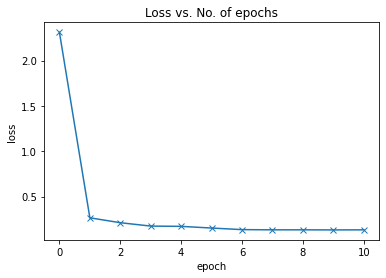

In [58]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

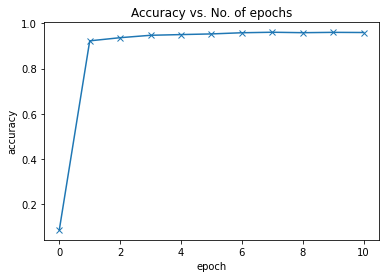

In [59]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

<h1  id="9" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  8 Predictions</h1>

In [60]:
def prediction(model, loader, device="cpu"):
    model.to(device)
    model.eval()
    preds_all = torch.LongTensor()
    
    with torch.no_grad():
        for images in loader:
            images = images.to(device)
            
            output = model.forward(images)            
            probs = torch.exp(output)
            pred = probs.to('cpu').max(dim=1)[1]
            preds_all = torch.cat((preds_all, pred), dim=0)
    return preds_all

In [61]:
test = testset.values.reshape(-1,1,28,28)
print("Shape of test set: {}".format(test.shape))

Shape of test set: (28000, 1, 28, 28)


In [62]:
test_tensor = torch.tensor(test)/255.0

In [63]:
test_loader = DataLoader(test_tensor, batch_size=16)
y_pred = prediction(model, test_loader)
print("Prediction completed...")

# Creating a dataframe for results
test = pd.read_csv("../input/digit-recognizer/test.csv")
result = pd.DataFrame({'ImageId': test.index, 'Label': y_pred})
result["ImageId"] += 1
result.head()

Prediction completed...


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


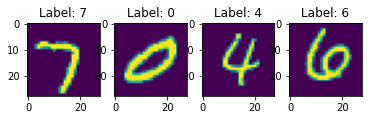

In [64]:
# Plot images from test data and see predictions
indices = [41, 314, 2022, 22111]
f,ax = plt.subplots(1, len(indices))
for i in range(len(indices)):
    title = "Label: {}".format(int(y_pred[indices[i]]))
    ax[i].imshow( test_tensor[indices[i],0] )
    ax[i].set_title(title)

In [71]:
result.to_csv('submission.csv', index=False)
print("Resuls are saved to submission.csv")

Resuls are saved to submission.csv


<div class="alert alert-block alert-info" style="font-size:14px; font-family:Times New Roman; line-height: 1.7em;">
    📌 &nbsp;  If you find this notebook useful in anyway, please upvote it so that it can reach a bigger audience. You can share it with your fellow kagglers. 🙏🙏
</div>

<h1  id="10" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Whats Next??</h1>


<span style="font-family:Times New Roman; font-size:18px;"> [Linear Regression _ Pytorch For Beginner's](https://www.kaggle.com/code/abdulbasitniazi/linear-regression-pytorch-for-beginner-s) </span> 

<span style="font-family:Times New Roman; font-size:18px;"> [ENetB7 Explained 98% ✅ Fine Tuning ✅ EDA✅](https://www.kaggle.com/code/abdulbasitniazi/enetb7-explained-98-fine-tuning-eda) </span> 

<span style="font-family:Times New Roman; font-size:18px;"> [ResNet50_✅EDA✅Transfer Learning](https://www.kaggle.com/code/abdulbasitniazi/resnet50-eda-transfer-learning)</span> 

<span style="font-family:Times New Roman; font-size:18px;"> [ResNet50FromScratch📊 EDA 🐴🐆🐄🐏🐕](https://www.kaggle.com/code/abdulbasitniazi/resnet50fromscratch-eda)</span> 

<span style="font-family:Times New Roman; font-size:18px;"> [🐶Vs😻✅ How CNN Works? ✅EDA✅](https://www.kaggle.com/code/abdulbasitniazi/vs-how-cnn-works-eda)</span> 

<span style="font-family:Times New Roman; font-size:18px;"> [Medium Link](https://medium.com/@AB_Niazi)</span> 

<span style="font-family:Times New Roman; font-size:18px;"> [For Video Explanation  Youtube  Link](https://www.youtube.com/channel/UCSAw-QDHdXjrAMpg7-TELVA)</span> 








<span style="font-family:Times New Roman; font-size:18px;">Refernces </span>

[Akaash Tutorial on Jovian](https://jovian.ai/aakashns/04-feedforward-nn)

